<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/Cifar10/Cifar10_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
train_labels.shape (one-hot) = (50000, 10)
test_labels.shape (one-hot) = (10000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1045s 668ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 207s 660ms/step
Train Features Shape: (50000, 512)
Test Features Shape: (10000, 512)
KNN Accuracy: 0.4176


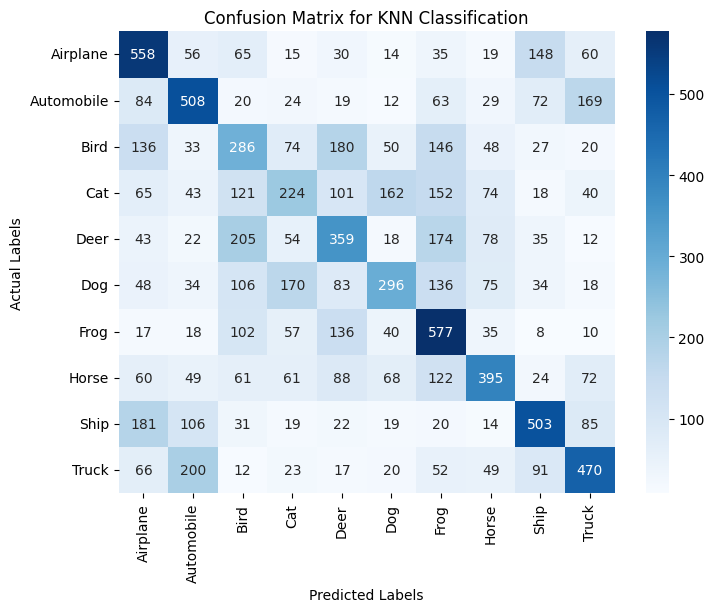

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# plt.figure(figsize=(10, 2))
# for i in range(5):
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(X_train[i])
#     plt.title(class_names[y_train[i][0]])  # CIFAR-10 클래스 이름 표시
#     plt.axis('off')
# plt.show()

# 레이블을 one-hot encoding으로 변환
train_labels = keras.utils.to_categorical(y_train, 10)
test_labels = keras.utils.to_categorical(y_test, 10)

print('train_labels.shape (one-hot) =', train_labels.shape)
print('test_labels.shape (one-hot) =', test_labels.shape)

train_images, test_images = X_train / 255, X_test / 255


# CNN 모델 정의 (특성 추출기로만 사용함)
# MLP 구조 그대로 유지함 (v1)
cnn_model = Sequential([
    Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    GlobalAveragePooling2D(),
    keras.layers.Flatten()
])

# CNN 특성 추출
X_train_features = cnn_model.predict(train_images)
X_test_features = cnn_model.predict(test_images)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# KNN 모델 학습
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_features, np.argmax(train_labels, axis=1))  # 원핫 방식을 정수형 라벨로 변환

# KNN 예측 및 평가
y_pred = knn.predict(X_test_features)
knn_accuracy = accuracy_score(np.argmax(test_labels, axis=1), y_pred)
print("KNN Accuracy:", knn_accuracy)


# 혼동 행렬 생성
conf_mat = confusion_matrix(np.argmax(test_labels, axis=1), y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for KNN Classification')
plt.show()